<a href="https://colab.research.google.com/github/Nisarg111/RNN-Stock-Predictor/blob/main/Stock%20Trend%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
data_set = pd.read_csv('https://github.com/Nisarg111/Time-Series/blob/main/Datasets/Google_Stock_Price_Train.csv?raw=true')
data_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
data_set_train = data_set.iloc[:,1:2].values
data_set_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
sc = MinMaxScaler(feature_range=(0,1))
training_data_scaled = sc.fit_transform(data_set_train)
training_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
x_train_list = []
y_train_list = []

# Loop Explanation 1st iteration will take 0 to 119 values from training dataset, and from which column data
# will be selected is specified by the second parameter which is 0 here, this data will be copied to x_train
# For y_train only ith value be selected and added
# So we will predict the trend of the stock based on previous 120 days
# Like using first array in xtrain which is from 0 to 119 we can predict the trend on 120

for i in range(120, 1258):
  x_train_list.append(training_data_scaled[i-120:i,0])
  y_train_list.append(training_data_scaled[i,0])
x_train, y_train = np.array(x_train_list), np.array(y_train_list)
x_train.shape

(1138, 120)

In [20]:
# Reshaping data
# Reason to reshape the x train is keras accepts a 3D tensor(array)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1));
x_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
regressor = Sequential()

In [24]:
# LSTM(input_size) does not take no. of rows because
# the number of samples is not relevant to the internal calculations of the layer.
# It only takes no. of features and number of time steps

# Layer 1
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Layer 2
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 3
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 4
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(Dense(units=1))

In [26]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
36/36 [==============================] - 18s 250ms/step - loss: 0.0496
Epoch 2/100
36/36 [==============================] - 10s 269ms/step - loss: 0.0075
Epoch 3/100
36/36 [==============================] - 10s 277ms/step - loss: 0.0066
Epoch 4/100
36/36 [==============================] - 10s 275ms/step - loss: 0.0061
Epoch 5/100
36/36 [==============================] - 9s 238ms/step - loss: 0.0062
Epoch 6/100
36/36 [==============================] - 10s 279ms/step - loss: 0.0065
Epoch 7/100
36/36 [==============================] - 11s 310ms/step - loss: 0.0062
Epoch 8/100
36/36 [==============================] - 9s 256ms/step - loss: 0.0064
Epoch 9/100
36/36 [==============================] - 9s 244ms/step - loss: 0.0051
Epoch 10/100
36/36 [==============================] - 11s 304ms/step - loss: 0.0056
Epoch 11/100
36/36 [==============================] - 10s 280ms/step - loss: 0.0052
Epoch 12/100
36/36 [==============================] - 9s 246ms/step - loss: 0.0053
Epoch

In [29]:
dataset_test = pd.read_csv('https://github.com/Nisarg111/Time-Series/blob/main/Datasets/Google_Stock_Price_Test.csv?raw=true')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [41]:
# Here merge original data set
# Then take inputs
# First we need to predict values of jan so we need 120 values before jan
# then we reshape inputs into a 2D array as required by over LSTM


dataset_total = pd.concat((data_set['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


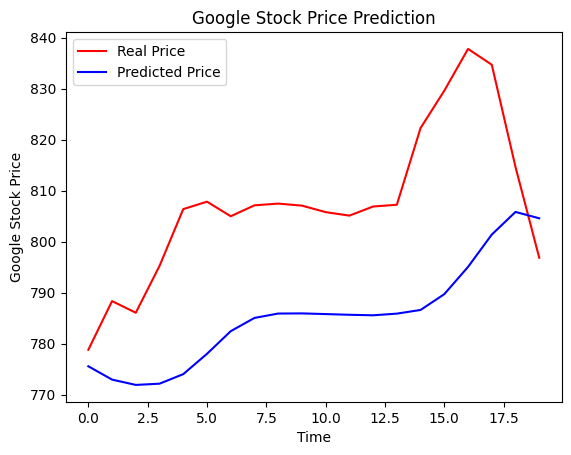

In [42]:
plt.plot(real_stock_price, color='red',label='Real Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()